<a href="https://colab.research.google.com/github/spookyfish/intro_to_datascience/blob/master/notes/105_Image_Compression_with_Wavelets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Already up to date.


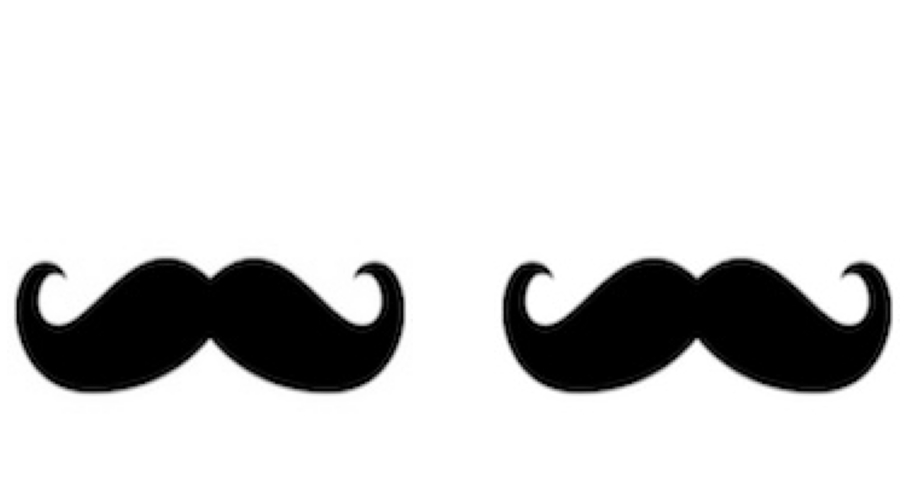

In [4]:
# Using the PyWavelets module, available at 
# https://pywavelets.readthedocs.io/en/latest/install.html

from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt
plt.rcParams['figure.figsize'] = [16, 16]
plt.rcParams.update({'font.size': 18})

!git -C intro_to_datascience pull || git clone https://github.com/spookyfish/intro_to_datascience.git

A = imread(os.path.join('intro_to_datascience','data','mustache.jpg'))
B = np.mean(A, -1); # Convert RGB to grayscale

fig,axs = plt.subplots(1, 2)

img = axs[0].imshow(A)
axs[0].axis('off')

img = axs[1].imshow(B)
img.set_cmap('gray')
axs[1].axis('off')

plt.show()

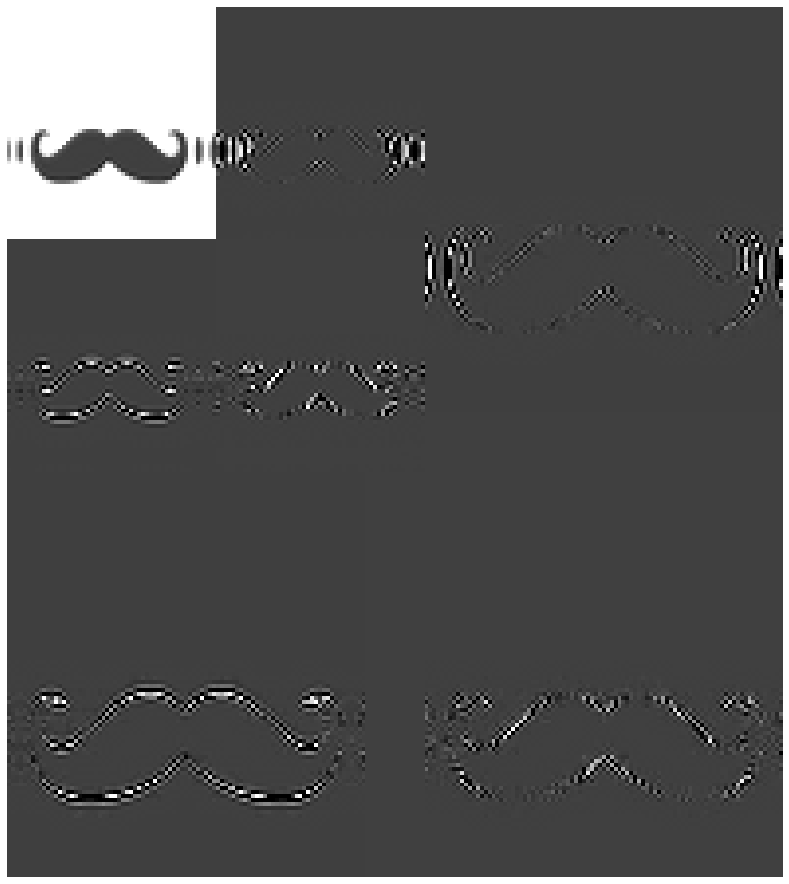

In [6]:
## Wavelet decomposition (2 level)
n = 2
w = 'sym8' # coif1, haar  https://pywavelets.readthedocs.io/en/latest/regression/wavelet.html
coeffs = pywt.wavedec2(B,wavelet=w,level=n)

# normalize each coefficient array
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(n):
    coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level + 1]]

arr, coeff_slices = pywt.coeffs_to_array(coeffs)



plt.imshow(arr,cmap='gray',vmin=-0.25,vmax=0.75)
plt.axis('off')
plt.show()

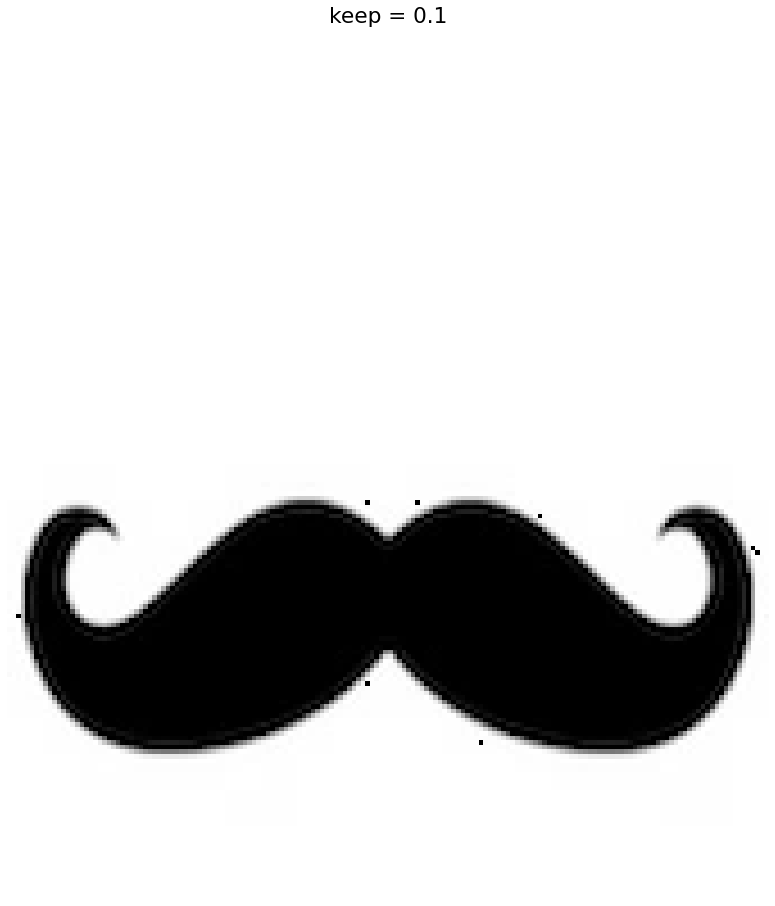

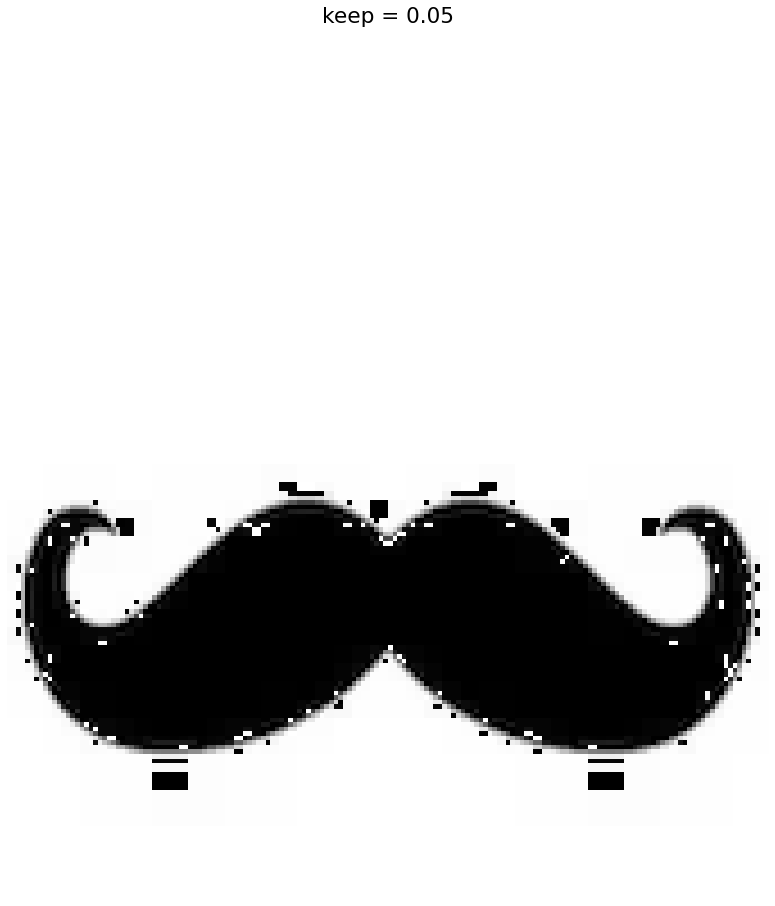

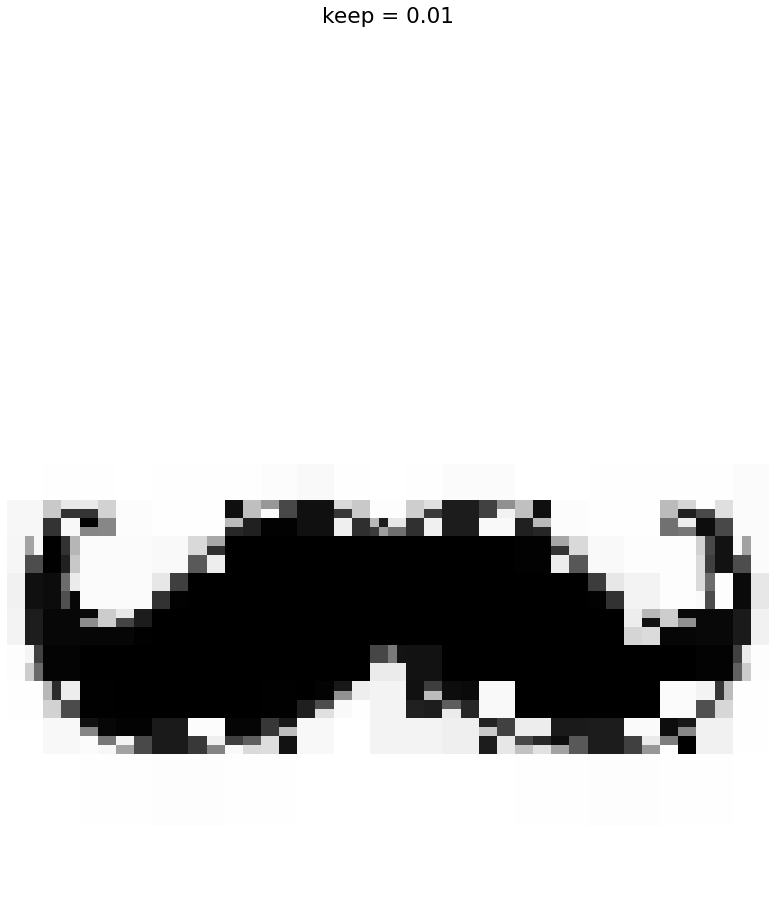

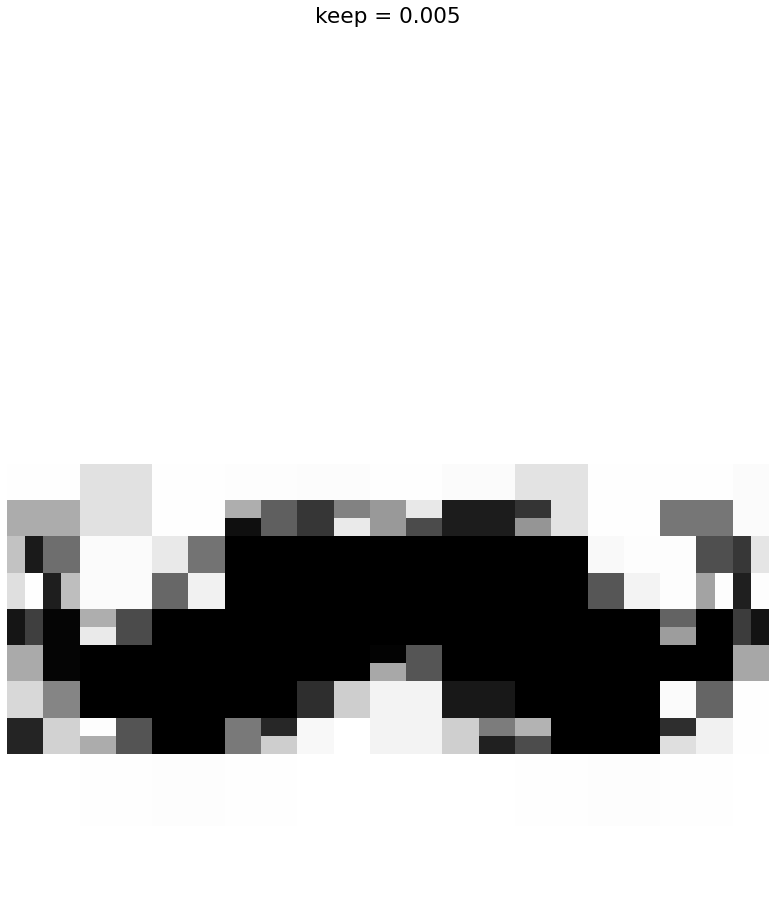

In [7]:
## Wavelet Compression
n = 4
w = 'db1' # https://pywavelets.readthedocs.io/en/latest/regression/wavelet.html
coeffs = pywt.wavedec2(B,wavelet=w,level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

for keep in (0.1, 0.05, 0.01, 0.005):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind # Threshold small indices
    
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
    # Plot reconstruction
    Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('keep = ' + str(keep))